# **Project 2: Loan Approval Prediction**

***Hafiz Syed Sharjeel Najam***


*Machine Learning Intern - Elevvo Pathways*

## Project Description
This project helps predict whether a loan application is likely to be approved based on an applicant’s financial and personal details. By analyzing factors such as income, age, credit score, and property area, the system supports faster and more reliable decision-making for both applicants and financial institutions.

## Setup and Dataset Downloading

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from imblearn.over_sampling import SMOTE

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("supratimnag06/loan-approval-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 32.2k/32.2k [00:00<00:00, 2.12MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/supratimnag06/loan-approval-prediction-dataset/versions/1


In [ ]:
df = pd.read_csv(rf'{path}/loan_approval.csv')

In [ ]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


## Data Cleaning & Analysis
- Handled missing values by filling the `median` for numerical features and `mode` for categorical features.
- Encoded Categorical variables using OneHot and Label Encoding.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [ ]:
df = df.drop(columns=['Applicant_ID'], axis=1)

### Handling Missing Values

In [ ]:
df.count().sum()

np.int64(18050)

In [ ]:
df.isna().sum()

,0
Applicant_Income,50
Coapplicant_Income,50
Employment_Status,50
Age,50
Marital_Status,50
Dependents,50
Credit_Score,50
Existing_Loans,50
DTI_Ratio,50
Savings,50


In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    print(f'{feature}: {df[feature].unique()}')

Employment_Status: ['Salaried' 'Self-employed' 'Contract' 'Unemployed' nan]
Marital_Status: ['Married' 'Single' nan]
Loan_Purpose: ['Personal' 'Car' nan 'Business' 'Home' 'Education']
Property_Area: ['Urban' 'Semiurban' 'Rural' nan]
Education_Level: ['Not Graduate' 'Graduate' nan]
Gender: ['Female' nan 'Male']
Employer_Category: ['Private' 'Government' 'Unemployed' nan 'MNC' 'Business']
Loan_Approved: ['No' 'Yes' nan]


In [ ]:
df_copy = df.copy()
df_copy = df_copy.dropna()
df_copy.count().sum()

np.int64(7125)

In [ ]:
numerical_features = df_copy.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
df[numerical_features] = num_imputer.fit_transform(df[numerical_features])
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

In [ ]:
df.isna().sum()

,0
Applicant_Income,0
Coapplicant_Income,0
Employment_Status,0
Age,0
Marital_Status,0
Dependents,0
Credit_Score,0
Existing_Loans,0
DTI_Ratio,0
Savings,0


### Encoding Categorical Variables

In [ ]:
one_hot_features = ['Marital_Status', 'Gender', 'Education_Level']
label_encode_features = ['Employment_Status', 'Loan_Purpose', 'Property_Area', 'Employer_Category']

In [ ]:
label_encoder = LabelEncoder()
for feature in label_encode_features:
    df[feature] = label_encoder.fit_transform(df[feature])
for feature in one_hot_features:
    df = pd.get_dummies(df, columns=[feature], prefix=[feature])
df['Loan_Approved'] = df['Loan_Approved'].map({'Yes': 1, 'No': 0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Applicant_Income              1000 non-null   float64
 1   Coapplicant_Income            1000 non-null   float64
 2   Employment_Status             1000 non-null   int64  
 3   Age                           1000 non-null   float64
 4   Dependents                    1000 non-null   float64
 5   Credit_Score                  1000 non-null   float64
 6   Existing_Loans                1000 non-null   float64
 7   DTI_Ratio                     1000 non-null   float64
 8   Savings                       1000 non-null   float64
 9   Collateral_Value              1000 non-null   float64
 10  Loan_Amount                   1000 non-null   float64
 11  Loan_Term                     1000 non-null   float64
 12  Loan_Purpose                  1000 non-null   int64  
 13  Prop

### Data Analysis and Feature Importance

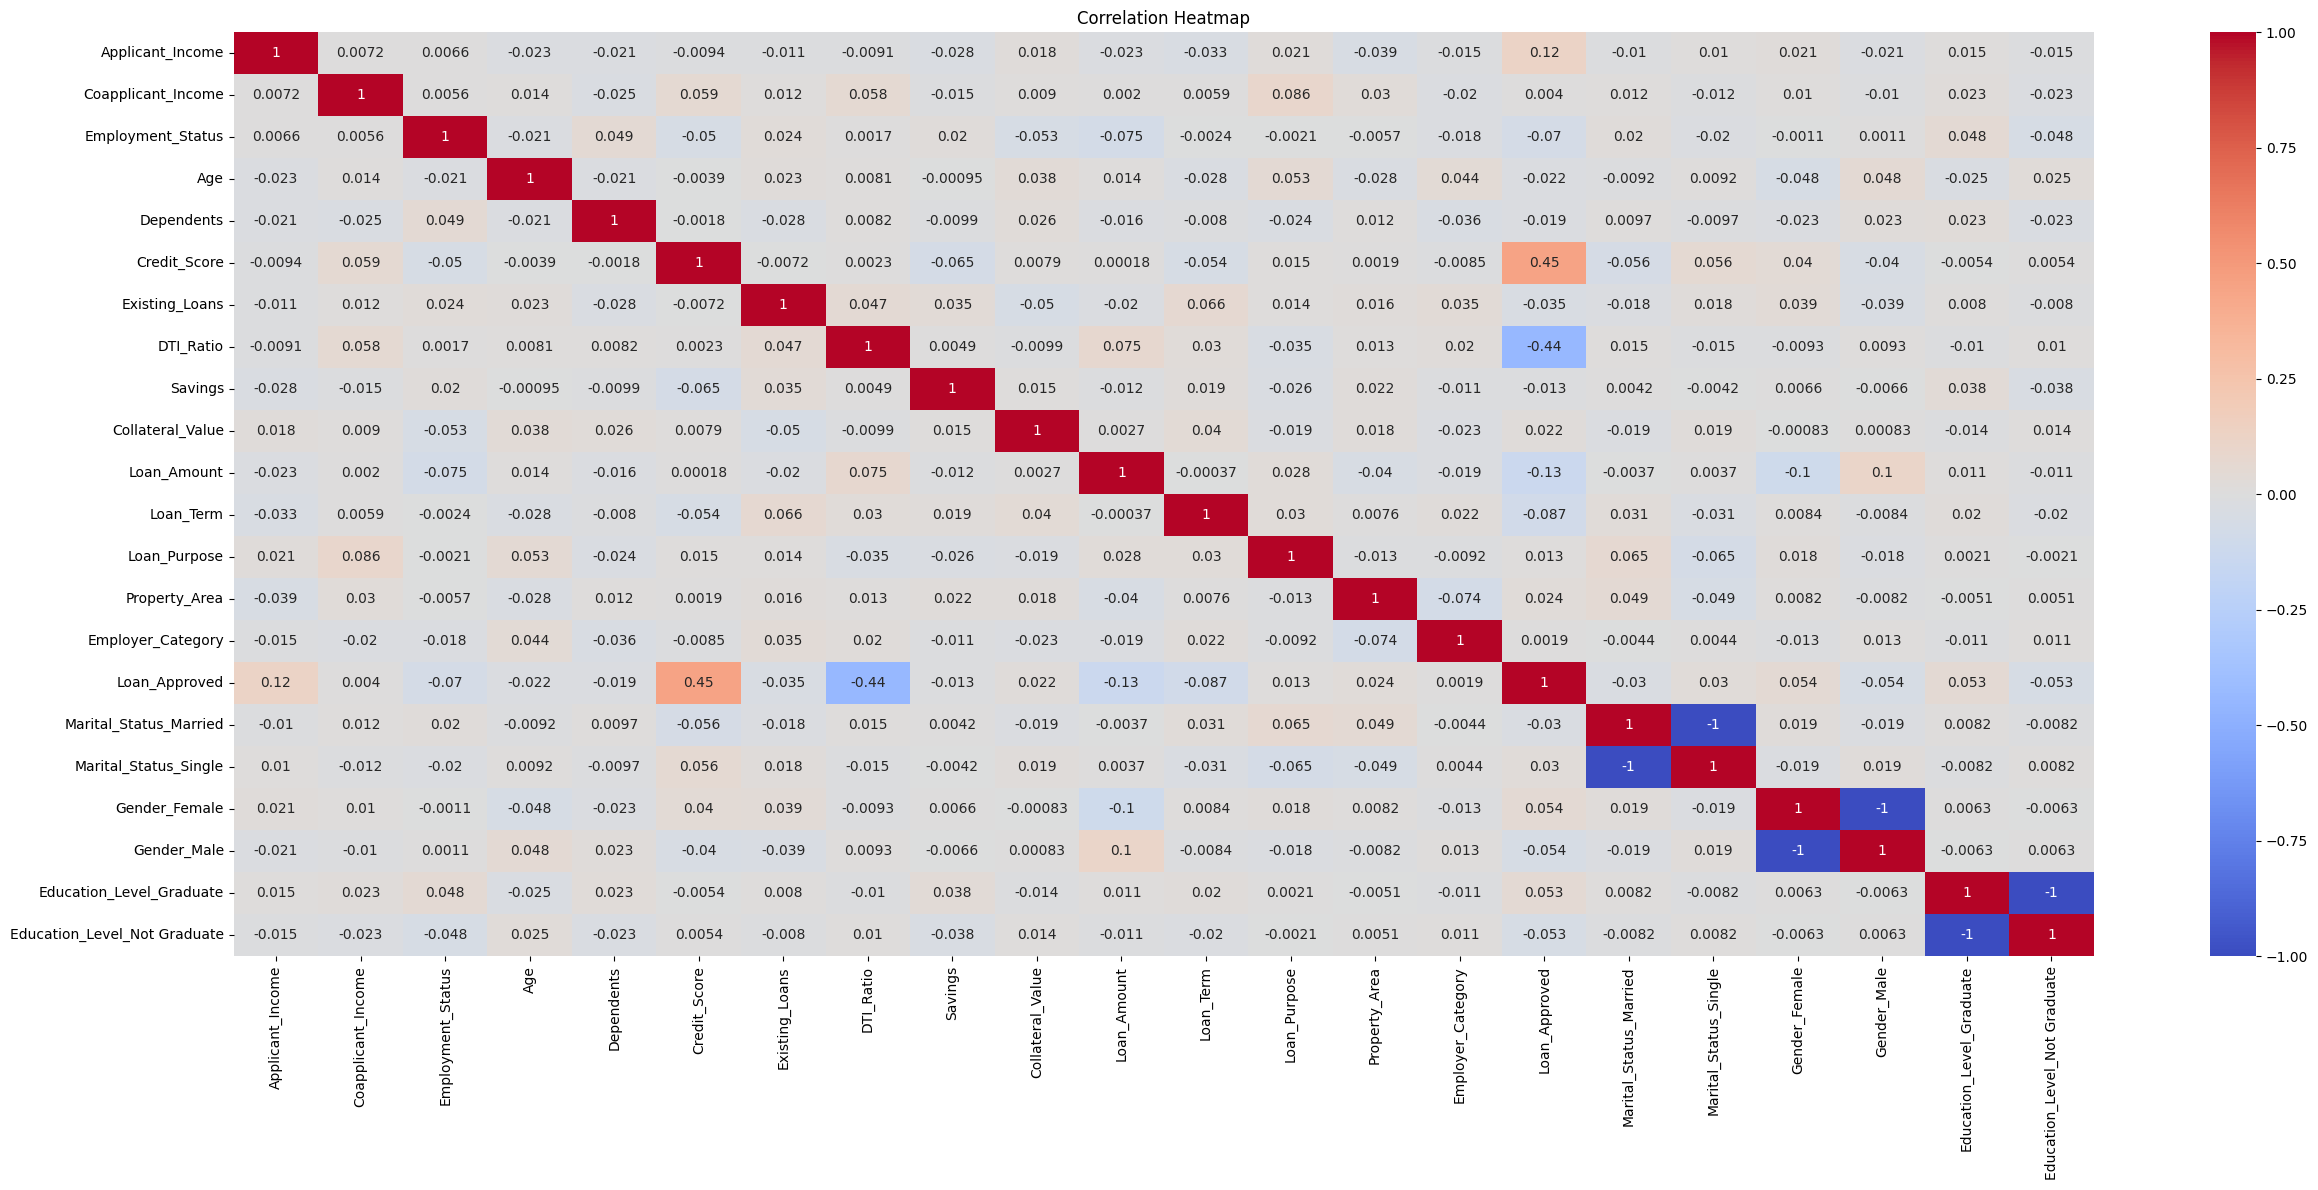

In [ ]:
df_corr = df.corr()
plt.figure(figsize=(30, 12))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr = df.corr(numeric_only=True)['Loan_Approved'].drop('Loan_Approved')
corr_sorted = corr.sort_values(ascending=False)
fig = px.bar(
    x=corr_sorted.index,
    y=corr_sorted.values,
    labels={'x': 'Features', 'y': 'Correlation with Loan_Approved'},
    title="Correlation of Features with Loan_Approved"
)
fig.show()

**Feature Importance Visualization Results**
- Credit Score: 0.45
- Applicant Income: 0.12
- Gender: 0.053
- Education Level: 0.053
- Marital Status: 0.03
- DTI Ratio: -0.44

## Machine Learning Steps and Model Selection
- Split the dataset into training and testing sets using `train_test_split`.
- Following Models are trained, evaluated and visualized for help in selecting the best one:
    1. Logistic Regression.
    2. Random Forest Classifier.
    3. XGBoost Classifier.
- These models are evaluated using `Mean Squared Error` and `Confusion Matrix`

### Data Splitted into Training and Testing Sets

In [ ]:
X = df.drop('Loan_Approved', axis=1)
y = df['Loan_Approved']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Logistic Regression

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression MSE:  0.288


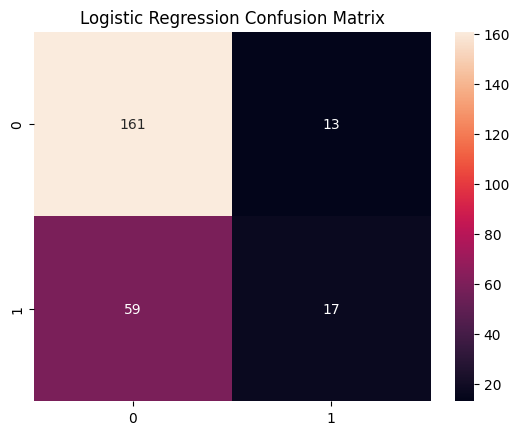

Training MSE (Logistic Regression):  0.2946666666666667
Testing MSE (Logistic Regression):  0.288


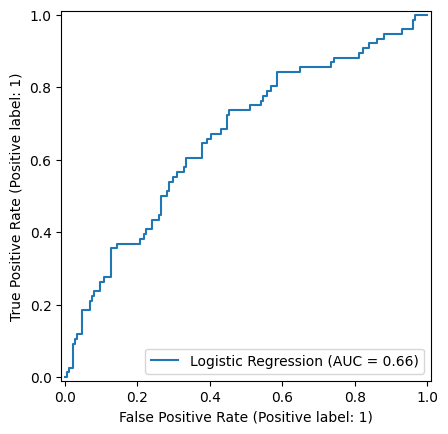

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print('Logistic Regression MSE: ', mse_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.show()
roc_lr = RocCurveDisplay.from_estimator(model_lr, X_test, y_test, name='Logistic Regression')
print(roc_lr)
mse_train_lr = mean_squared_error(y_train, model_lr.predict(X_train))
mse_test_lr = mean_squared_error(y_test, model_lr.predict(X_test))
print('Training MSE (Logistic Regression): ', mse_train_lr)
print('Testing MSE (Logistic Regression): ', mse_test_lr)

### Random Forest Classifer



Random Forest MSE:  0.116


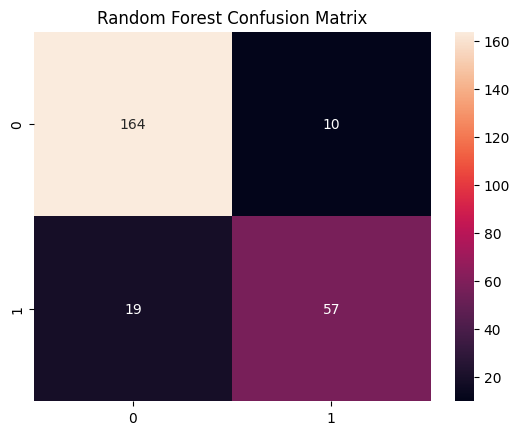

Training MSE (Random Forest):  0.048
Testing MSE (Random Forest):  0.116


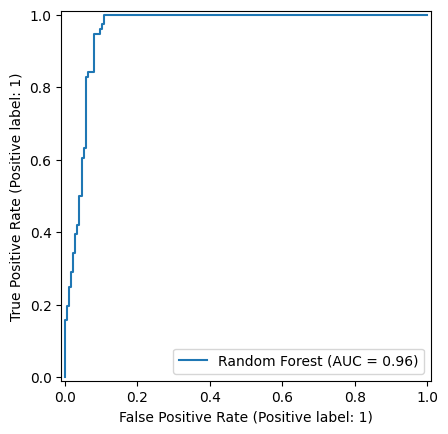

In [ ]:
model_rf = RandomForestClassifier(n_estimators=200, n_jobs=1, max_leaf_nodes=10)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random Forest MSE: ', mse_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()
roc_rf = RocCurveDisplay.from_estimator(model_rf, X_test, y_test, name='Random Forest')
print(roc_rf)
mse_train_rf = mean_squared_error(y_train, model_rf.predict(X_train))
mse_test_rf = mean_squared_error(y_test, model_rf.predict(X_test))
print('Training MSE (Random Forest): ', mse_train_rf)
print('Testing MSE (Random Forest): ', mse_test_rf)

### XGB Classifier

XGBoost MSE:  0.056


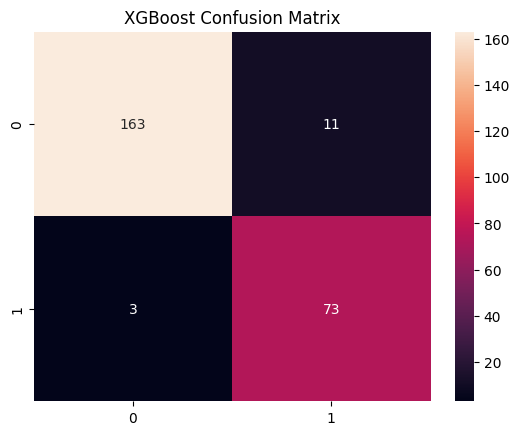

Training MSE (XGBoost):  0.036
Testing MSE (XGBoost):  0.056


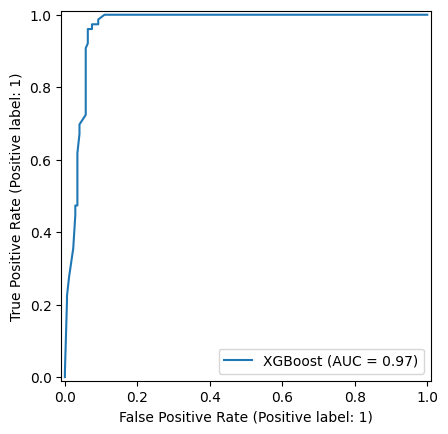

In [ ]:
model_xgb = XGBClassifier(n_estimators=4, n_jobs=-1)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print('XGBoost MSE: ', mse_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d')
plt.title('XGBoost Confusion Matrix')
plt.show()
roc_xgb = RocCurveDisplay.from_estimator(model_xgb, X_test, y_test, name='XGBoost')
print(roc_xgb)
mse_train_xgb = mean_squared_error(y_train, model_xgb.predict(X_train))
mse_test_xgb = mean_squared_error(y_test, model_xgb.predict(X_test))
print('Training MSE (XGBoost): ', mse_train_xgb)
print('Testing MSE (XGBoost): ', mse_test_xgb)

**Result for Model Training and Evaluation**
- MSE of XGB Classifier is lowest among the three models with the value of 0.056.
- All three models are checked for overfitting and underfitting by comparing training and test MSEs

In [ ]:
y.value_counts()

,count
Loan_Approved,
0,702
1,298


### Steps for Further Accuracy

- Applied SMOTE to target the problem of class imbalancing which somehow added bias in model decision.
- All three models trained and evaluated again by same method.

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

### Logistic Regression

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression MSE:  0.36


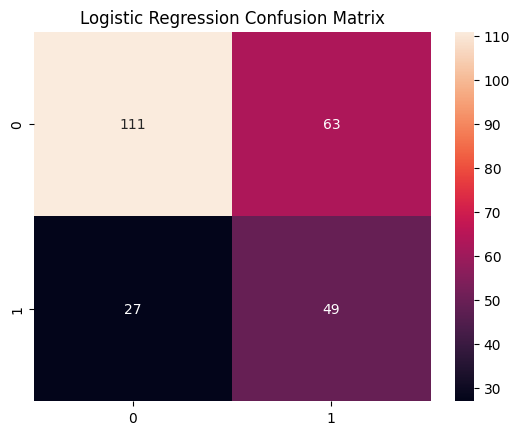

Training MSE (Logistic Regression):  0.3456439393939394
Testing MSE (Logistic Regression):  0.36


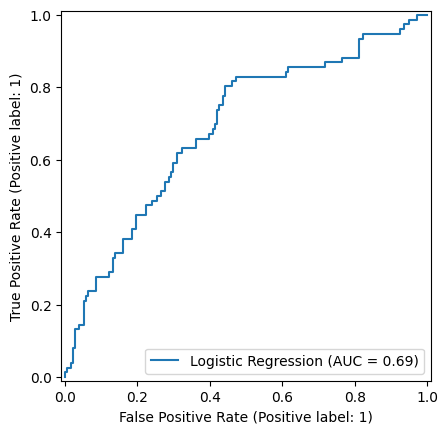

In [ ]:
model_lr_res = LogisticRegression()
model_lr_res.fit(X_train_res, y_train_res)
y_pred_lr_res = model_lr_res.predict(X_test)
mse_lr_res = mean_squared_error(y_test, y_pred_lr_res)
print('Logistic Regression MSE: ', mse_lr_res)
cm_lr_res = confusion_matrix(y_test, y_pred_lr_res)
sns.heatmap(cm_lr_res, annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.show()
roc_lr_res = RocCurveDisplay.from_estimator(model_lr_res, X_test, y_test, name='Logistic Regression')
print(roc_lr_res)
mse_train_lr_res = mean_squared_error(y_train_res, model_lr_res.predict(X_train_res))
mse_test_lr_res = mean_squared_error(y_test, model_lr_res.predict(X_test))
print('Training MSE (Logistic Regression): ', mse_train_lr_res)
print('Testing MSE (Logistic Regression): ', mse_test_lr_res)

### Random Forest Classifier

Random Forest MSE:  0.084


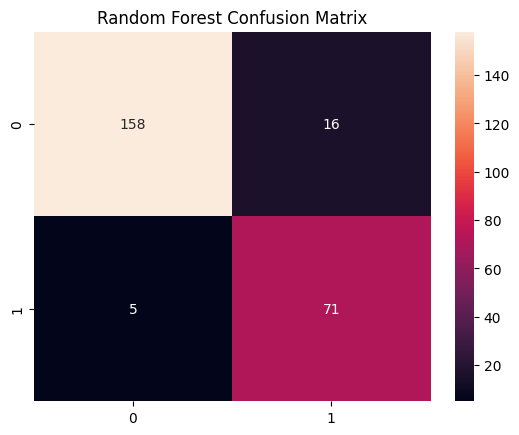

Training MSE (Random Forest):  0.035037878787878785
Testing MSE (Random Forest):  0.084


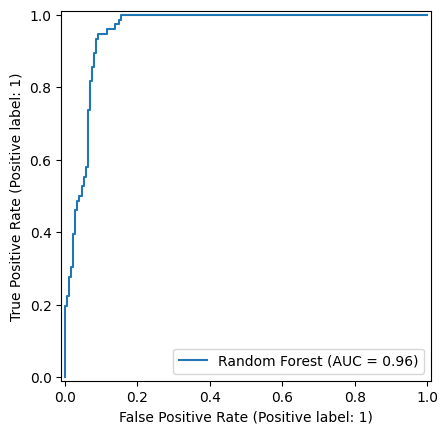

In [ ]:
model_rf_res = RandomForestClassifier(n_estimators=200, n_jobs=1, max_leaf_nodes=10)
model_rf_res.fit(X_train_res, y_train_res)
y_pred_rf_res = model_rf_res.predict(X_test)
mse_rf_res = mean_squared_error(y_test, y_pred_rf_res)
print('Random Forest MSE: ', mse_rf_res)
cm_rf_res = confusion_matrix(y_test, y_pred_rf_res)
sns.heatmap(cm_rf_res, annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()
roc_rf_res = RocCurveDisplay.from_estimator(model_rf_res, X_test, y_test, name='Random Forest')
print(roc_rf_res)
mse_train_rf_res = mean_squared_error(y_train_res, model_rf_res.predict(X_train_res))
mse_test_rf_res = mean_squared_error(y_test, model_rf_res.predict(X_test))
print('Training MSE (Random Forest): ', mse_train_rf_res)
print('Testing MSE (Random Forest): ', mse_test_rf_res)

### XGBoost Classifier

XGBoost MSE:  0.072


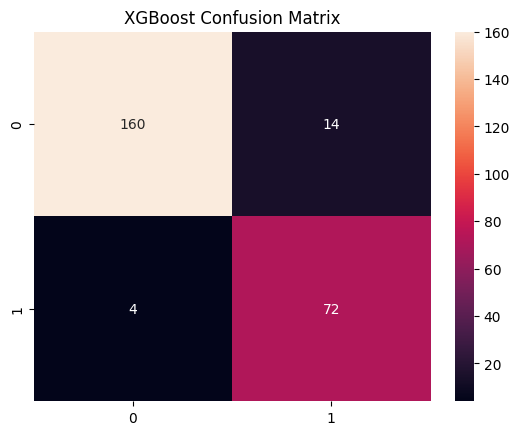

Training MSE (XGBoost):  0.027462121212121212
Testing MSE (XGBoost):  0.072


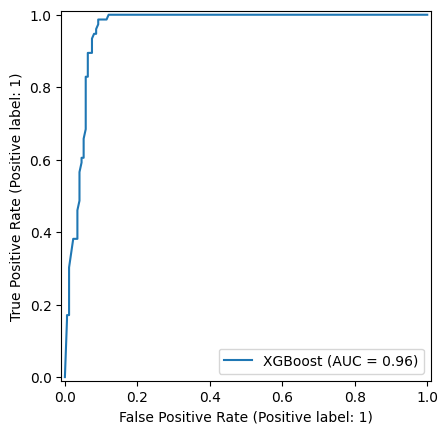

In [ ]:
model_xgb_res = XGBClassifier(n_estimators=4, n_jobs=-1)
model_xgb_res.fit(X_train_res, y_train_res)
y_pred_xgb_res = model_xgb_res.predict(X_test)
mse_xgb_res = mean_squared_error(y_test, y_pred_xgb_res)
print('XGBoost MSE: ', mse_xgb_res)
cm_xgb_res = confusion_matrix(y_test, y_pred_xgb_res)
sns.heatmap(cm_xgb_res, annot=True, fmt='d')
plt.title('XGBoost Confusion Matrix')
plt.show()
roc_xgb_res = RocCurveDisplay.from_estimator(model_xgb_res, X_test, y_test, name='XGBoost')
print(roc_xgb_res)
mse_train_xgb_res = mean_squared_error(y_train_res, model_xgb_res.predict(X_train_res))
mse_test_xgb_res = mean_squared_error(y_test, model_xgb_res.predict(X_test))
print('Training MSE (XGBoost): ', mse_train_xgb_res)
print('Testing MSE (XGBoost): ', mse_test_xgb_res)

**Results of Model Training, Evaluation and Visualization after SMOTE**

- After class balancing MSEs of all the three models are improved.
- MSE of XGBoost is lowest with value of 0.072
- All the three models are checked again for overfitting or underfitting by checking the train and test MSEs.
- In this problem, **Decision Tree model (XGBoost)** worked well in both cases i.e. Balanced and Imbalanced classes.